# Un problema de agrupación con KMeans

En este taller estudiarás conceptos mostrados en el tutorial de "Solución de problemas con KMeans", utilizando el conjunto de datos de popularidad de canciones. Particularmente, realizarás los siguientes procesos:

1. Cargar un conjunto de datos.
2. Limpiar y preparar los datos para el modelado.
3. Seleccionar el hiperparámetro K mediante el método del codo y de la silueta.
4. Interpretar los grupos resultantes del mejor modelo.

El problema a resolver es el siguiente: dadas las propiedades acústicas de un conjunto de canciones, queremos agrupar canciones con características similares. Antes de iniciar, es necesario importar algunas librerías: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

## 1. Carga de datos

Con las librerías importadas, seguiremos con la carga del conjunto de datos.

### Ejercicio 1.1.

Utiliza Pandas para importar el archivo que contiene el conjunto de datos de canciones.

* La ruta del archivo .csv es: `./data/song_data.csv`, y ya se encuentra en el entorno de Coursera, solo debes importarlo.
* La variable resultante debe tener el nombre `data_raw`, que representa el conjunto de datos sin modificar.

In [2]:
ruta = './data/song_data.csv'
# your code here
data_raw = pd.read_csv(ruta)

In [3]:
#---------- Celda de Pruebas ----------
# La variable "data_raw" existe
# El resultado es un DataFrame
# El resultado tiene las dimensiones correctas
#--------------------------------------

# Se verifica que la variable está definida
assert data_raw is not None, "Asegúrate de definir la variable correctamente."

# Se verifica que sea un DataFrame
assert isinstance(data_raw, pd.DataFrame), "El resultado debe ser un DataFrame."

# Se evalúan las dimensiones de la variable data
assert data_raw.shape == (18835,15), "¿Verificaste que la ruta del archivo CSV y el nombre de la variable son correctos?"
print("¡Los datos tienen las dimensiones correctas!")

¡Los datos tienen las dimensiones correctas!


En este punto puedes verificar el tamaño del conjunto de datos y puedes obtener una descripción inicial.

In [4]:
data_raw

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


## 2. Limpieza y preparación de los datos

Utilizaremos una nueva variable `data` para verificar que el conjunto no contiene errores, además de realizar las modificaciones necesarias al conjunto de datos.

In [5]:
data = data_raw.copy()

### Ejercicio 2.1.

Utiliza Pandas para obtener la cantidad de datos faltantes por variable.

* Define una variable con el nombre `p21` y asígnale las operaciones correspondientes para obtener la lista de datos faltantes. (`p21 = <<Operaciones>>`)
* La respuesta debe ser un arreglo con los datos faltantes por variable. Este arreglo es resultado de aplicar dos funciones a la variable `data`. (**Ejemplo: `p21 = data.<<Función1>>.<<Función2>>`**)
* Encontrarás una línea solo con el nombre de la variable. Esta línea se usa para que puedas visualizar tu respuesta, por lo que siempre debe ir al final y no la debes modificar.

In [6]:
# your code here
p21= data.isna().sum()
p21

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [7]:
#---------- Celda de Pruebas ----------
# La variable "p21" existe
# El resultado es una Serie de Pandas
# El resultado tiene las dimensiones correctas
#--------------------------------------

# Se verifica que la variable está definida
assert p21 is not None, "Asegúrate de definir la variable correctamente."

# Se verifica que sea una Serie de Pandas
assert isinstance(p21, pd.Series), "El resultado debe ser una Serie de Pandas."

# Se verifican las dimensiones de la respuesta
assert p21.shape == (15,), "Utiliza una función de Pandas para obtener los datos faltantes, y luego usa otra función para sumarlos."
print("¡Las dimensiones son correctas!")

¡Las dimensiones son correctas!


### Ejercicio 2.2.

Similar al ejercicio anterior, utiliza Pandas para obtener la cantidad de filas duplicadas.

* Define una variable con el nombre `p22` y asígnale las operaciones correspondientes para obtener el número de filas duplicadas (`p22 = <<Operaciones>>`).
* La respuesta debe ser un número entero con la cantidad de datos (filas) duplicados. Este número es resultado de aplicar dos funciones consecutivas a la variable `data`. (**Ejemplo: `p22 = data.<<Función1>>.<<Función2>>`**)
* Encontrarás una línea solo con el nombre de la variable. Esta línea se usa para que puedas visualizar tu respuesta, por lo que siempre debe ir al final y no la debes modificar.

In [8]:
# your code here
p22 = data.duplicated().sum()
p22

3909

In [9]:
#---------- Celda de Pruebas ----------
# La variable "p22" existe
# El resultado es un número entero
# El resultado está en el rango [0,18835]
#--------------------------------------

# Se verifica que la variable está definida
assert p22 is not None, "Asegúrate de definir la variable correctamente."

# Se evalúa el tipo de dato
assert type(p22) == np.int64 or type(p22) == int, "Recuerda que tu respuesta debe ser un número entero."

# Se evalúa el rango de respuesta
assert (p22 >= 0 and p22 <= 18835), "El número de filas duplicadas debe ser positivo y menor al total de filas"
print("¡El tipo y rango de la respuesta son correctos!")

¡El tipo y rango de la respuesta son correctos!


Es conveniente eliminar los datos duplicados, por lo que utilizaremos la función `drop_duplicates()`:

In [10]:
data = data.drop_duplicates()

Después de la limpieza de datos, puedes crear una celda para verificar el tamaño del conjunto resultante.

### Ejercicio 2.3.

Teniendo en cuenta que queremos predecir la popularidad de una canción dadas sus características acústicas, vamos a eliminar una variable que no es muy relevante: el nombre. Adicionalmente, vamos a eliminar las variables categóricas del conjunto, lo que nos ayudará con la agrupación. A continuación, utiliza Pandas para eliminar las columnas definidas en la variable `dropped_columns`.

* Para este punto no debes definir una nueva variable, sino asignar tu respuesta a la variable `data`. (**Ejemplo: `data = data.<<Función>>`**)

In [11]:
dropped_columns = ['song_name', 'key', 'time_signature', 'audio_mode']
# your code here
data = data.drop(dropped_columns, axis=1)

In [12]:
#---------- Celda de Pruebas ----------
# La variable "data" existe
# El resultado es un DataFrame
# El resultado tiene las dimensiones correctas
# El resultado no contiene las variables en "dropped_columns"
#--------------------------------------

# Se verifica que la variable está definida
assert data is not None, "Asegúrate de definir la variable correctamente."

# Se verifica que sea un DataFrame
assert isinstance(data, pd.DataFrame), "El resultado debe ser un DataFrame."

# Se evalúan las dimensiones de la variable data
assert data.shape == (14926,11), "¿Verificaste que el nombre de la variable es correcto y que la función utilizada es correcta?"

# Se verifica que las variables eliminadas son correctas
assert "song_name" not in data.columns, "Recuerda que debes eliminar la columna \'song_name\'."
assert "key" not in data.columns, "Recuerda que debes eliminar la columna \'key\'."
assert "time_signature" not in data.columns, "Recuerda que debes eliminar la columna \'time_signature\'."
assert "audio_mode" not in data.columns, "Recuerda que debes eliminar la columna \'audio_mode\'."

print("¡La variable tiene las dimensiones correctas!")

¡La variable tiene las dimensiones correctas!


Finalmente definiremos un objeto de la clase `StandardScaler()`, que utilizarás para realizar la estandarización:

In [13]:
scaler = StandardScaler()

## 3. Selección del hiperparámetro K

Inicialmente crearemos un objeto de la clase `KMeans` para ejecutar el algoritmo de agrupación, especificando un máximo de iteraciones con el parámetro `max_iter` y la semilla con el parámetro `random_state`:

In [14]:
kmeans = KMeans(max_iter=300, random_state=0)

### Ejercicio 3.1.

Utiliza `scikit-learn` para construir un pipeline con los pasos de estandarización y ejecución del algoritmo KMeans.

* Define una variable con el nombre `pipe` y asígnale la expresión necesaria para crear un pipeline con las variables `scaler` y `kmeans`. (**Ejemplo: `pipe = <<Expresión>>`**)
* Los nombres de los pasos deben ser `"scaler"` para la variable `scaler` y `"model"` para la variable `kmeans`.

In [15]:
# your code here
pipe = Pipeline(steps=[("scaler", scaler), ("model", kmeans)])

In [16]:
#---------- Celda de Pruebas ----------
# La variable "pipe" existe
# La variable "pipe" es una instancia de la clase Pipeline
#--------------------------------------

# Se verifica que la variable está definida
assert pipe is not None, "Asegúrate de definir la variable correctamente."

# Se verifica que sea una instancia de la clase Pipeline
assert isinstance(pipe, Pipeline), "El resultado debe ser una instancia de la clase Pipeline."

print("¡El pipeline está definido correctamente!")

¡El pipeline está definido correctamente!


A continuación definiremos la función `elbow_plot()`, que ejecutará KMeans con cada valor de _k_ definido por el rango `[k_min, k_max]`, generando una gráfica con los valores de inercia:

In [17]:
def elbow_plot(data, k_min=2, k_max=10):
    """
    Genera la gráfica para el método del codo
    
    Parametros:
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    inertias = []
    for i in range(k_min, k_max+1):
        # Modificamos el parámetro k
        pipe.set_params(model__n_clusters=i)
        # Ejecutamos el pipeline, entrenando el modelo de KMeans
        pipe.fit(data)
        # Almacenamos el valor de inercia
        inertias.append(pipe['model'].inertia_)
    
    # Graficamos los valores de inercia
    plt.plot(range(k_min,k_max+1), inertias, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inercia')
    plt.grid()
    plt.show()

Con la función construida, veremos el comportamiento para este conjunto de datos:

/Users/alejandraossayepes/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alejandraossayepes/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alejandraossayepes/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alejandraossayepes/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

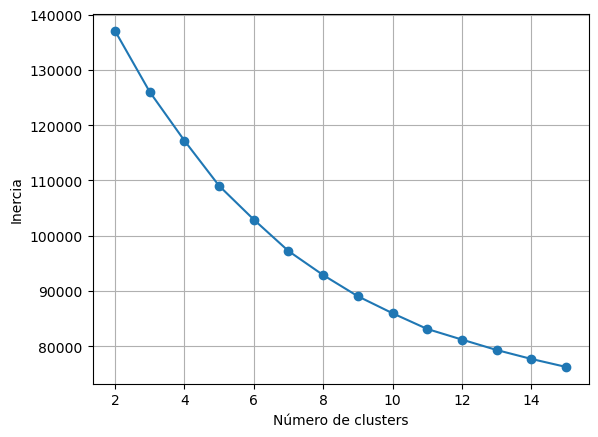

In [18]:
elbow_plot(data, 2, 15)

Igualmente, definiremos la función `silhouette_plot()` para obtener el valor promedio del coeficiente de la silueta para cada valor de _k_:

In [19]:
def silhouette_plot(data, k_min=2, k_max=5):
    """
    Genera la gráfica con el coeficiente de la silueta
    
    Parametros:
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    scores = []
    for i in range(k_min, k_max+1):
        # Modificamos el parámetro k
        pipe.set_params(model__n_clusters=i)
        # Ejecutamos el pipeline, entrenando el modelo de KMeans
        pipe.fit(data)
        # Procesamos los datos
        scaler_data = scaler.fit_transform(data)
        # Almacenamos el coeficiente de la silueta
        score = silhouette_score(scaler_data, pipe['model'].labels_)
        scores.append(score)
    
    # Graficamos los coeficientes de la silueta
    plt.plot(range(k_min,k_max+1), scores, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

Con la función para el método de la silueta, veremos el comportamiento:

/Users/alejandraossayepes/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alejandraossayepes/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alejandraossayepes/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alejandraossayepes/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

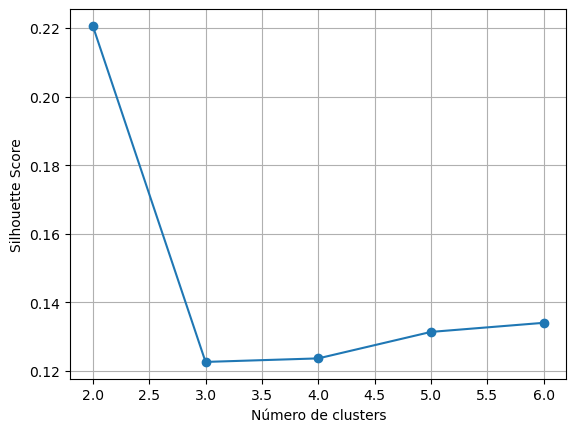

In [20]:
silhouette_plot(data, 2, 6)

### Ejercicio 3.2.

Con las gráficas generadas, utiliza el método del codo y el método de la silueta para seleccionar el mejor _k_.

* Define una variable con el nombre `mejor_k` y asígnale el mejor valor de K. (**Ejemplo: `mejor_k = 10`**)
* Encontrarás una línea solo con el nombre de la variable. Esta línea se usa para que puedas visualizar tu respuesta, por lo que siempre debe ir al final y no la debes modificar.

In [21]:
# your code here
mejor_k = 4
mejor_k

4

In [23]:
#---------- Celda de Pruebas ----------
# La variable "mejor_k" existe
# La variable es un número entero
# La variable se encuentra en el rango [2,15]
#--------------------------------------
# Se verifica que la variable está definida
assert mejor_k is not None, "Asegúrate de definir la variable correctamente."

# Se evalúa el tipo de dato
assert type(mejor_k) == int or type(mejor_k) == np.int64, "Recuerda que tu respuesta debe ser un número entero."

# Se evalúa el rango de respuesta
assert (mejor_k >= 2 and mejor_k <= 15), "Verifica los límites de la variable, que corresponden a los límites usados en el llamado a la función elbow_plot()."
print("¡El tipo y valor de K son correctos!")

¡El tipo y valor de K son correctos!


## 4. Interpretación de los grupos resultantes del mejor modelo

Con el mejor valor de K, primero ejecutaremos el algoritmo de KMeans:

In [23]:
pipe.set_params(model__n_clusters=mejor_k)
pipe.fit(data)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=0, tol=0.0001,
                        verbose=0))],
         verbose=False)

### Ejercicio 4.1.

Utilizando el modelo entrenado con el mejor valor de K, obtén la lista de etiquetas del grupo al que pertenece cada dato.

* Define una variable con el nombre `labels` y, utilizando la variable `pipe`, asígnale la lista de etiquetas para el conjunto de datos. (**Ejemplo: `labels = pipe<<Expresión>>`**)
* Encontrarás dos líneas al final de la celda para obtener el número de datos por grupo. Estas líneas se usan para que puedas visualizar tu respuesta, por lo que siempre deben ir al final y no las debes modificar.

In [24]:
# your code here
labels = pipe['model'].labels_
indexes, values = np.unique(labels, return_counts=True)
{indexes[i]: values[i] for i in range(len(indexes))}

{0: 4309, 1: 5845, 2: 2791, 3: 1981}

In [25]:
#---------- Celda de Pruebas ----------
# La variable "labels" existe
# La variable es un arreglo de numpy
# La variable tiene longitud igual al conjunto de datos
#--------------------------------------
# Se verifica que la variable está definida
assert labels is not None, "Asegúrate de definir la variable correctamente."

# Se evalúa el tipo de dato
assert type(labels) == np.ndarray, "Recuerda que tu respuesta debe ser un arreglo de numpy."

# El arreglo tiene la longitud correcta
assert len(labels) == 14926, "El arreglo debe tener longitud igual al número de datos del conjunto."
print("¡El tipo y longitud del arreglo de etiquetas son correctos!")

¡El tipo y longitud del arreglo de etiquetas son correctos!


### Ejercicio 4.2.

Similar al ejercicio anterior, obtén la lista de centroides de cada grupo generado.

* Define una variable con el nombre `centroids_array` y, utilizando la variable `pipe`, asígnale la lista de centroides generados. (**Ejemplo: `centroids_array = pipe<<Expresión>>`**)
* Encontrarás dos líneas al final de la celda para convertir la lista de centroides a un DataFrame. Estas líneas se usan para que puedas visualizar tu respuesta, por lo que siempre deben ir al final y no las debes modificar.

In [26]:
# your code here
centroids_array = pipe['model'].cluster_centers_
centroids = pd.DataFrame(centroids_array, columns=data.columns)
centroids

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
0,-0.208458,0.307785,-0.577865,-0.660117,0.592385,0.062990,0.383687,0.428692,-0.286412,0.390343,-0.452693
1,0.175985,-0.089745,-0.218335,0.548051,0.250891,-0.248509,-0.241279,0.260377,-0.308022,-0.159897,0.654470
2,-0.078405,-0.187394,1.481810,-0.539889,-1.483076,0.622945,-0.237350,-1.321124,-0.414247,-0.325229,-0.678575
3,0.044714,-0.140920,-0.184678,0.578943,0.058956,-0.280683,0.210950,0.159006,2.112883,0.080242,0.009545


In [27]:
#---------- Celda de Pruebas ----------
# La variable "centroids_array" existe
# La variable es un arreglo de numpy
# La variable tiene dimensiones correctas
#--------------------------------------
# Se verifica que la variable está definida
assert centroids_array is not None, "Asegúrate de definir la variable correctamente."

# Se evalúa el tipo de dato
assert type(centroids_array) == np.ndarray, "Recuerda que tu respuesta debe ser un arreglo de numpy."
print("¡El tipo y dimensiones del arreglo son correctos!")

¡El tipo y dimensiones del arreglo son correctos!


### Ejercicio 4.3.

Finalmente, utiliza el objeto `scaler` para convertir los valores de los centroides a sus escalas originales.

* Define una variable con el nombre `centroids_transformed` y, utilizando la variable `scaler` y los centroides `centroids`, transforma los valores de los centroides. (**Ejemplo: `centroids_transformed = scaler.<<Función>>`**)
* Encontrarás dos líneas al final de la celda para convertir la lista de centroides a un DataFrame. Estas líneas se usan para que puedas visualizar tu respuesta, por lo que siempre deben ir al final y no las debes modificar.

In [28]:
# your code here
centroids_transformed = scaler.inverse_transform(centroids)
centroids_transformed_df = pd.DataFrame(centroids_transformed, columns=data.columns)
centroids_transformed_df

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
0,44.502784,238136.511601,0.098187,0.520165,0.771123,0.107212,0.236105,-5.954518,0.069763,132.442013,0.414813
1,52.337269,213355.017967,0.205365,0.711147,0.695397,0.032315,0.145427,-6.630898,0.067525,116.461024,0.689112
2,47.153101,207267.685909,0.712190,0.539170,0.310892,0.241849,0.145997,-12.986214,0.056527,111.659156,0.358851
3,49.662128,210164.792234,0.215399,0.716030,0.652836,0.024579,0.211042,-7.038260,0.318192,123.435523,0.529332


In [29]:
#---------- Celda de Pruebas ----------
# La variable "centroids_transformed" existe
# La variable es un arreglo de numpy
# La variable tiene dimensiones correctas
#--------------------------------------
# Se verifica que la variable está definida
assert centroids_transformed is not None, "Asegúrate de definir la variable correctamente."

# Se evalúa el tipo de dato
assert type(centroids_transformed) == np.ndarray, "Recuerda que tu respuesta debe ser un arreglo de numpy."
print("¡El tipo y dimensiones del arreglo son correctos!")

¡El tipo y dimensiones del arreglo son correctos!


## Cierre

Al realizar los ejercicios de este taller, has reforzado tus capacidades para entrenar un modelo de KMeans y obtener el mejor valor de K mediante el método del codo y el método de la silueta. Además, lograste obtener el número de elementos por cada grupo, además de los centroides resultantes. 

---
*Creado por: Nicolás Díaz*  
*Revisado por: Haydemar Nuñez*  
*Versión de: Agosto 31, 2023*  
*Universidad de los Andes*   